<h1>02 Data Cleaning and EDA</h1>
In this notebook, the training dataset is cleaned and EDA is performed.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MonthLocator, DateFormatter

In [17]:
#import the dataset
df = pd.read_csv('./datasets/train_merge_with_features_and_stores.csv')

In [18]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [19]:
df[['MarkDown4','MarkDown5','CPI','Unemployment','Size']].describe()

,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,67474.850000,108519.280000,227.232807,14.313000,219622.000000


## Key point: Weekly_Sales has a negative number; Mark Down 2,3 also have negative numbers.

In [20]:
#len(df[df['Weekly_Sales']<0].index)

In [21]:
#1285/421570*100=0.3%. Those rows can be dropped safely.
#df.drop(df[df['Weekly_Sales']<0].index,inplace=True)

#################NO need to remove negative sales############################

In [22]:
#import the test dataset
df_test = pd.read_csv('./datasets/test_merge_with_features_and_stores.csv')

In [23]:
#convert temp from degree F to degree C
df_test['Temperature']=(df['Temperature']-32)/1.8

In [24]:
#convert 'Date' to datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df_test[['CPI','Unemployment','Size']].describe()

,CPI,Unemployment,Size
count,76902.000000,76902.000000,115064.000000
mean,176.961347,6.868733,136497.688921
std,41.239967,1.583427,61106.926438
min,131.236226,3.684000,34875.000000
25%,138.402033,5.771000,93638.000000
50%,192.304445,6.806000,140167.000000
75%,223.244532,8.036000,202505.000000
max,228.976456,10.199000,219622.000000


<h2>What features contain null values?</h2>

In [26]:
df.isnull().sum().to_frame()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


Only MarkDowns have missing values. 

# 1) The overall trend of sales figure

In [27]:
weekly_trend = df.groupby('Date')['Weekly_Sales'].sum()

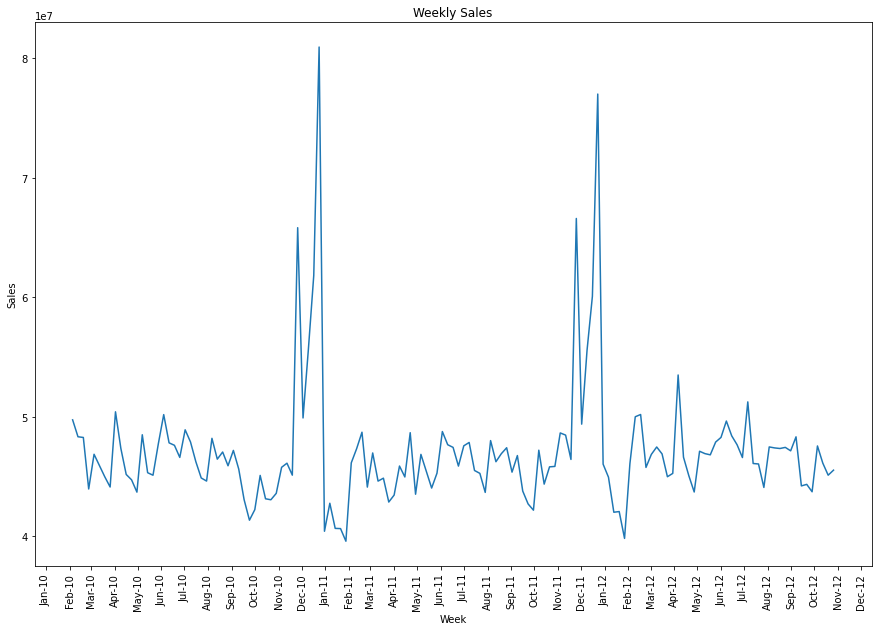

In [28]:

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(weekly_trend)

#defines the tick location 
ax.xaxis.set_major_locator(MonthLocator())
#defines the label format
ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
ax.tick_params(axis="x", labelrotation= 90)


plt.title("Weekly Sales")
plt.xlabel('Week') 
plt.ylabel('Sales') 
plt.show()

It seems that the weekly sales follows a cyclic trend: the sales figure flcuates at the beginning of the year. On Nov the sales suddenly boosts then declines. Shortly after that the weekly sales roars in Dec, reaching a new peak, and declines shortly afterwards.

## Key point: weekly sales follows a cyclic trend

## Correlation between numeric features and sales

<AxesSubplot:>

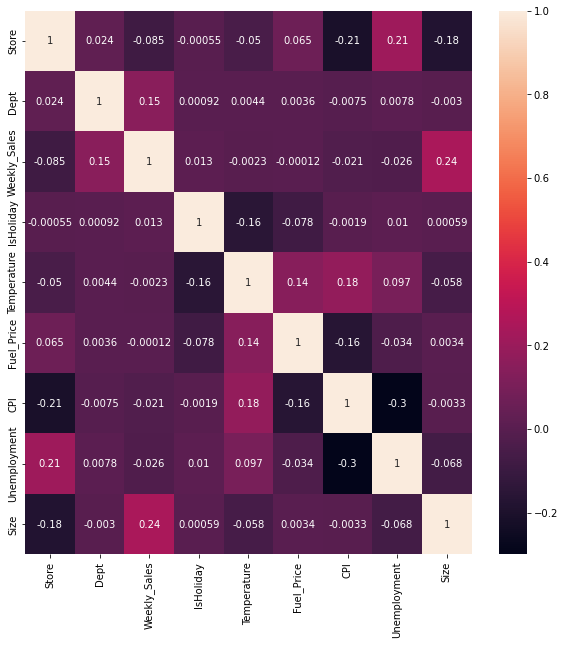

In [29]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1).corr(),annot=True)

We'll focus on what is correlated with Weekly_sales. Along the Weekly_Sales column, Size has a relatively hight correlaiton (0.24 while other values are much less than 0.1). <br>

Dept and Store are considered as categorical features. So their values are ignored.

## Key Point: Size is correlated to Weekly_Sales

# Types of stores and its effect on weekly_sales

<AxesSubplot:>

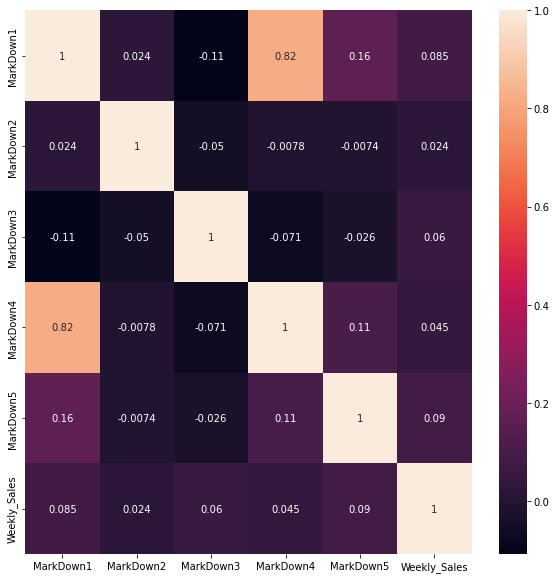

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Weekly_Sales']].corr(),annot=True)

## Key: markdown has not correlation with Weekly_Sales

In [31]:
store_size_sales = df[['Type','Size','Weekly_Sales']]

In [32]:
store_size_sales.groupby('Type')['Weekly_Sales'].mean()

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64

Text(0, 0.5, 'Average Weekly Sales')

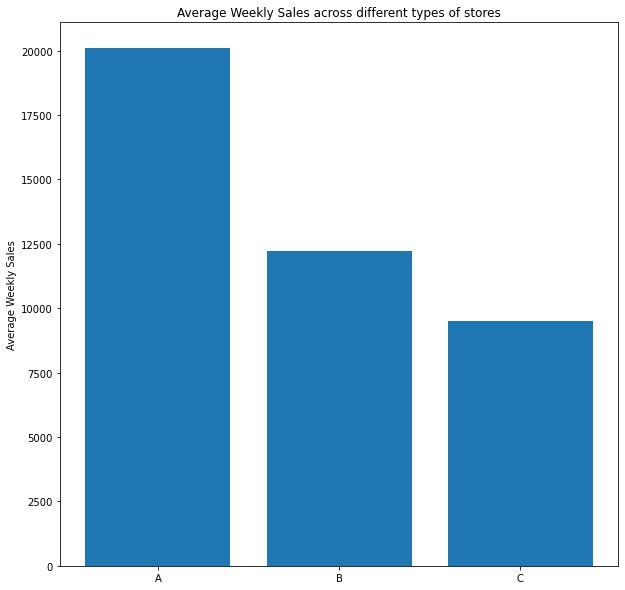

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x = ['A','B','C'], height = store_size_sales.groupby('Type')['Weekly_Sales'].mean())
ax.set_title('Average Weekly Sales across different types of stores')
plt.ylabel('Average Weekly Sales')

Perhaps that can be explained by the size of the stores:

Text(0, 0.5, 'Average store size')

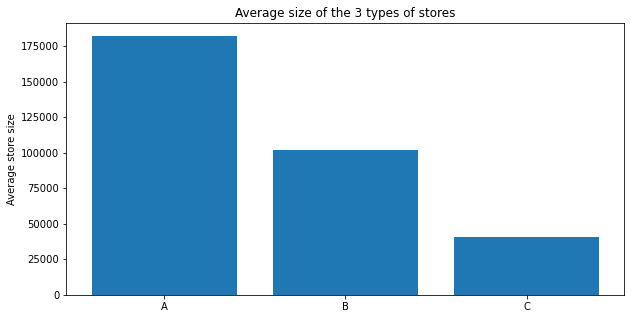

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x = ['A','B','C'], height = store_size_sales.groupby('Type')['Size'].mean())
ax.set_title('Average size of the 3 types of stores')
plt.ylabel('Average store size')

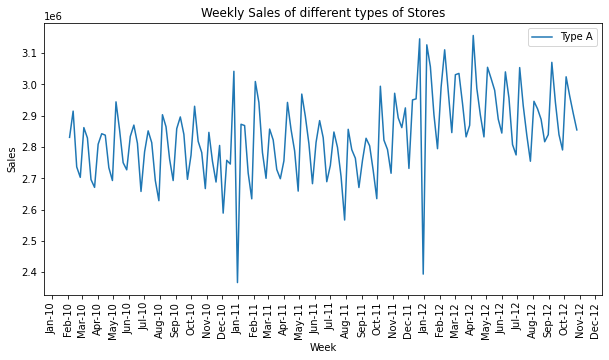

In [35]:
fig, ax = plt.subplots(figsize=(10,5))

#ax.plot(df[df['Type']=='A'].groupby('Date')['Weekly_Sales'].sum())
#ax.plot(df[df['Type']=='B'].groupby('Date')['Weekly_Sales'].sum())
ax.plot(df[df['Type']=='C'].groupby('Date')['Weekly_Sales'].sum())

#defines the tick location 
ax.xaxis.set_major_locator(MonthLocator())
#defines the label format
ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
ax.tick_params(axis="x", labelrotation= 90)

plt.xticks(rotation=90)
plt.title("Weekly Sales of different types of Stores")
plt.xlabel('Week') 
plt.ylabel('Sales')
plt.legend(["Type A", "Type B","Type C"])
plt.show()

## Key Point: Types of store affect weekly_sales

# 2) Seperate the data according to types of stores

In [36]:
df_typeA = df[df['Type']=='A']
df_typeB = df[df['Type']=='B']
df_typeC = df[df['Type']=='C']

In [37]:
df_typeB

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
20482,3,1,2010-02-05,6453.58,False,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,B,37392
20483,3,2,2010-02-05,17566.72,False,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,B,37392
20484,3,3,2010-02-05,4710.29,False,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,B,37392
20485,3,4,2010-02-05,8495.10,False,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,B,37392
20486,3,5,2010-02-05,15051.48,False,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,B,37392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


## Type A features correlations

<AxesSubplot:>

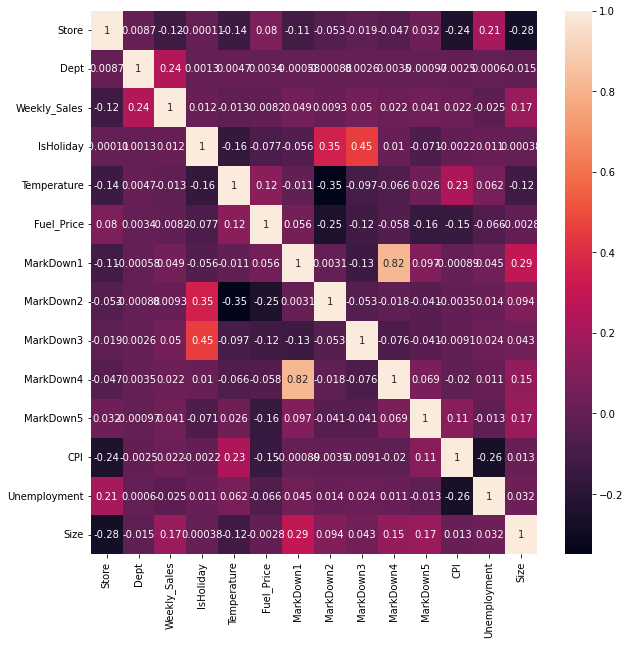

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_typeA.corr(),annot=True)

Correlation of Size and Weekly_Sales is 0.17, which is the highest among all features. Dept and Weekly_Sales(with correlation 0.24) is ignored since it's a categorical feature.<br>

For type A, do mark down 2 and mark down 4 increases during holiday?

## Key point: For Type A stores, Size might impact Weekly_Sales

## Type B features correlations

<AxesSubplot:>

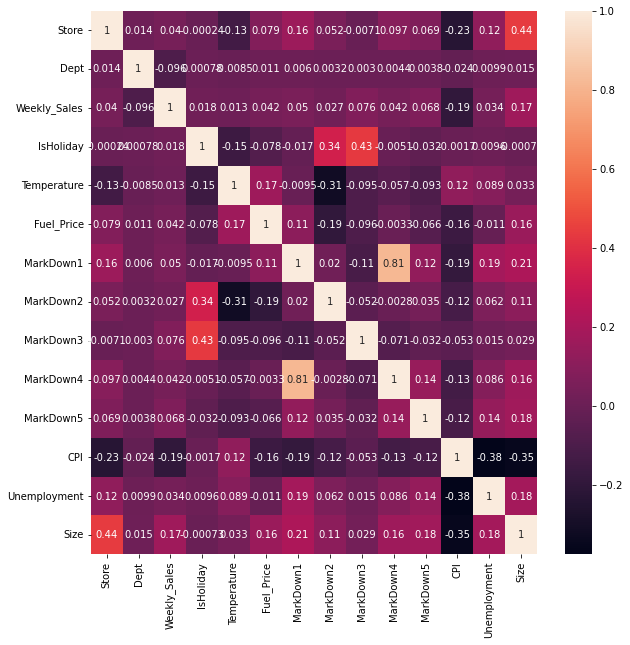

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_typeB.corr(),annot=True)

Similary to Type A store, only Size might be correlated with Weekly_Sales (correlation =0.17).

Markdown 2 and 3 and holiday correlations

## Key Point: For Type B store, Size might impact Weekly_Sales

## Type C store features correlation

<AxesSubplot:>

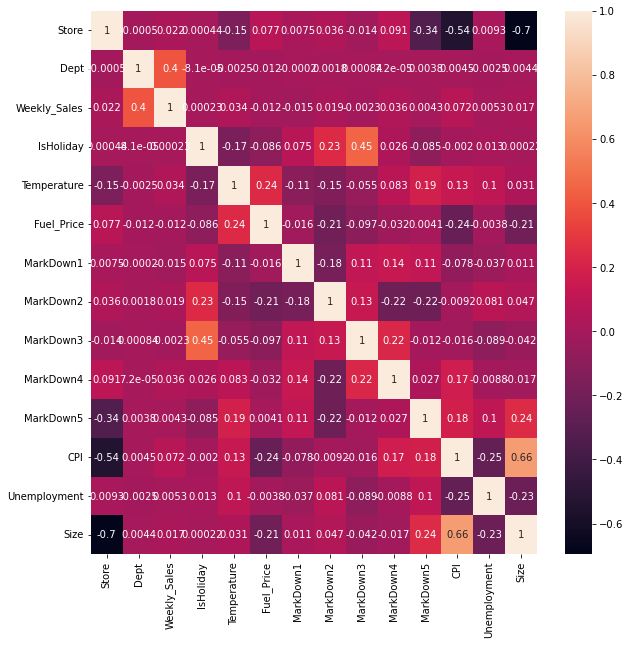

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_typeC.corr(),annot=True)

For Type C stores, none of the features is correlated with Weekly_Sales.
## Key point: for Type C stores, no features affect weekly_sales

# 2.1) How each single store affects Weekly_Sales.

### Type A stores weekly_sales across the department

In [41]:
df_typeA['year'] = pd.to_datetime(df_typeA['Date']).dt.year

C:\Users\Thomas\AppData\Local\Temp/ipykernel_8828/2477645395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_typeA['year'] = pd.to_datetime(df_typeA['Date']).dt.year


Text(0.5, 1.0, 'Type A Stores Weekly_Sales across different stores')

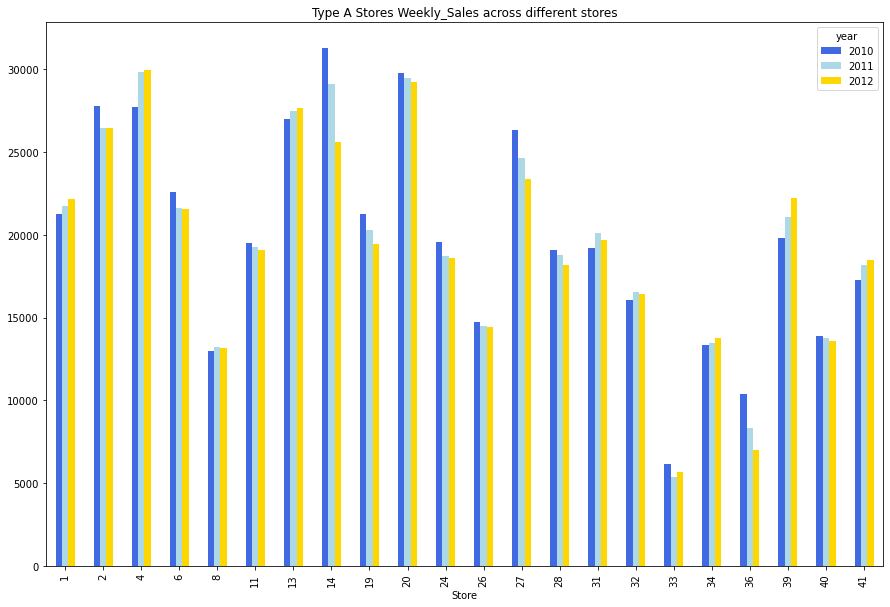

In [43]:
df_typeA.groupby(['Store','year'])['Weekly_Sales'].mean().unstack().plot(kind='bar',figsize=(15,10),color=['royalblue','lightblue','gold'])
plt.title('Type A Stores Weekly_Sales across different stores')


3 performing stores and 3 underperforming stores

In [91]:
df_typeA['year'].value_counts()

2011    78473
2010    72092
2012    64913
Name: year, dtype: int64

For each Type A stores, average weekly_sales remain relatively stable across the year. One thing that can be challenged is:
there is no complete date for 2011 and 2012.

## Key Point: Different Type A stores will affect weekly_sales, and this could be good indicator. However be aware of incomplete data.

## Type B Store Weekly_Sales across different stores

In [92]:
df_typeB['year'] = pd.to_datetime(df_typeB['Date']).dt.year

C:\Users\Thomas\AppData\Local\Temp/ipykernel_6076/490650313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_typeB['year'] = pd.to_datetime(df_typeB['Date']).dt.year


Text(0.5, 1.0, 'Type B Stores Weekly_Sales across different stores')

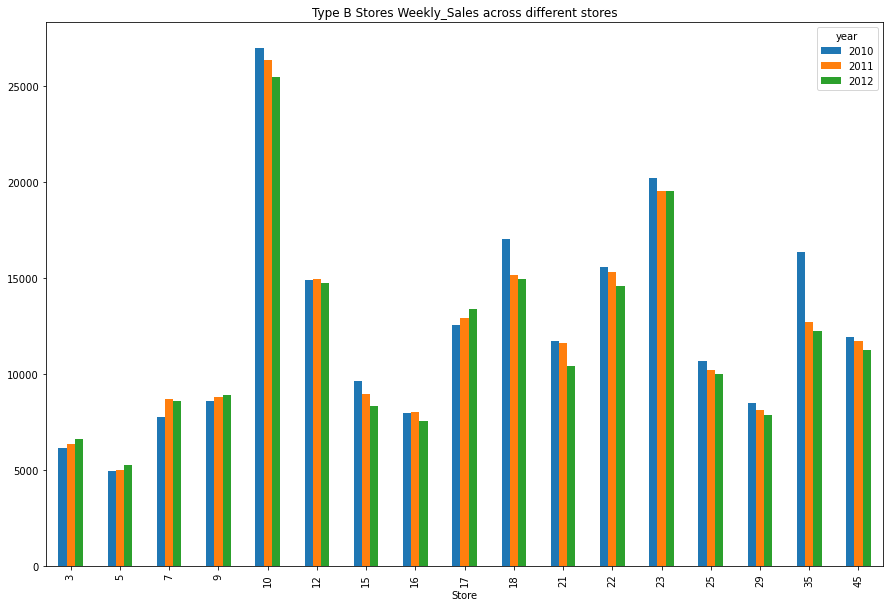

In [93]:
df_typeB.groupby(['Store','year'])['Weekly_Sales'].mean().unstack().plot(kind='bar',figsize=(15,10))
plt.title('Type B Stores Weekly_Sales across different stores')

Type B's sales is declining in these 2 years<br>
What is the driving force?

In [94]:
df_typeB['year'].value_counts()

2011    59466
2010    54642
2012    49387
Name: year, dtype: int64

Similar to Type A Stores, each Type B store could affect Weekly_Sales.

# Key Point: each Type B store affects Weekly_Sales. Beaware of incomplete data (for presentation sake)

## Type C store Weekly_Sales by store

In [95]:
df_typeC['year'] = pd.to_datetime(df_typeC['Date']).dt.year

C:\Users\Thomas\AppData\Local\Temp/ipykernel_6076/1980296220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_typeC['year'] = pd.to_datetime(df_typeC['Date']).dt.year


Text(0.5, 1.0, 'Type C Stores Weekly_Sales across different stores')

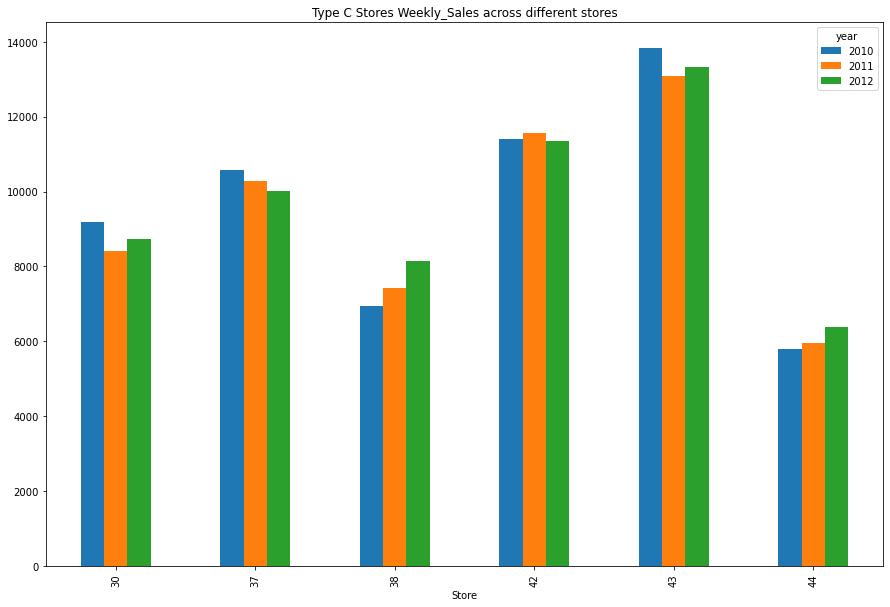

In [96]:
df_typeC.groupby(['Store','year'])['Weekly_Sales'].mean().unstack().plot(kind='bar',figsize=(15,10))
plt.title('Type C Stores Weekly_Sales across different stores')

In [97]:
df_typeB['year'].value_counts()

2011    59466
2010    54642
2012    49387
Name: year, dtype: int64

## Key Point: Each single Type C stores also impact Weekly_Sales

### Perhaps that can be explained by the size of store:
If the store is larger, it will have more space to store inventories. Also, it can accomodate more customers.

## Key point: Weekly_Sales accross stores PERHAPS can be explained by store size

In [98]:
df['year'] = pd.to_datetime(df['Date']).dt.year

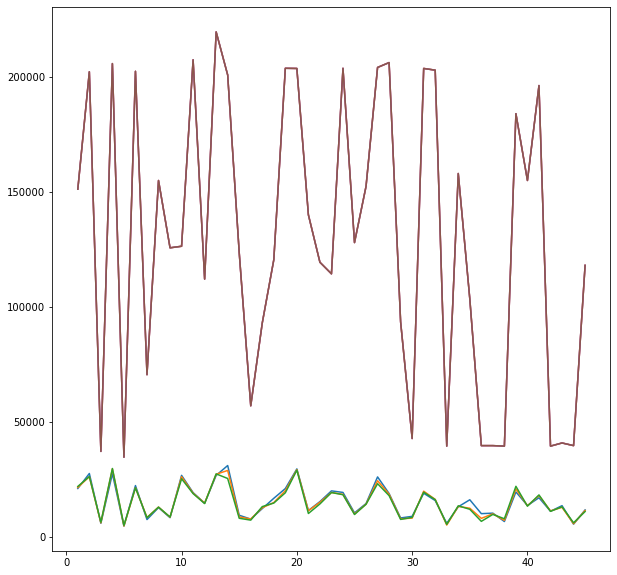

In [99]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(df.groupby(['Store','year'])['Weekly_Sales'].mean().unstack())
plt.plot(df.groupby(['Store','year'])['Size'].mean().unstack())

Text(0.5, 1.0, 'Average Weekly Sales across stores')

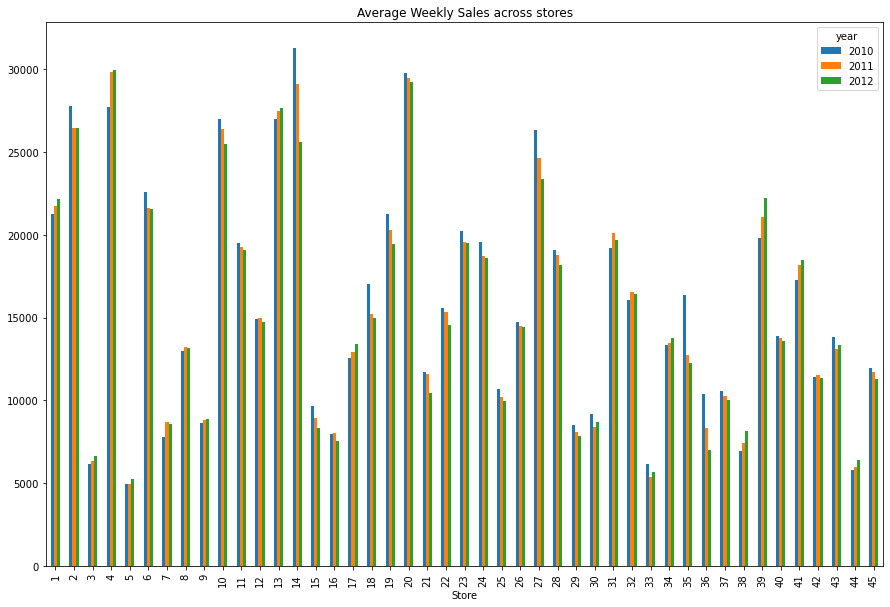

In [100]:
df_stores = df.groupby(['Store','year'])['Weekly_Sales'].mean().unstack().plot(kind='bar',figsize=(15,10))
plt.title('Average Weekly Sales across stores')

CAn focus on the top 10/20 

Text(0.5, 1.0, 'Size across stores')

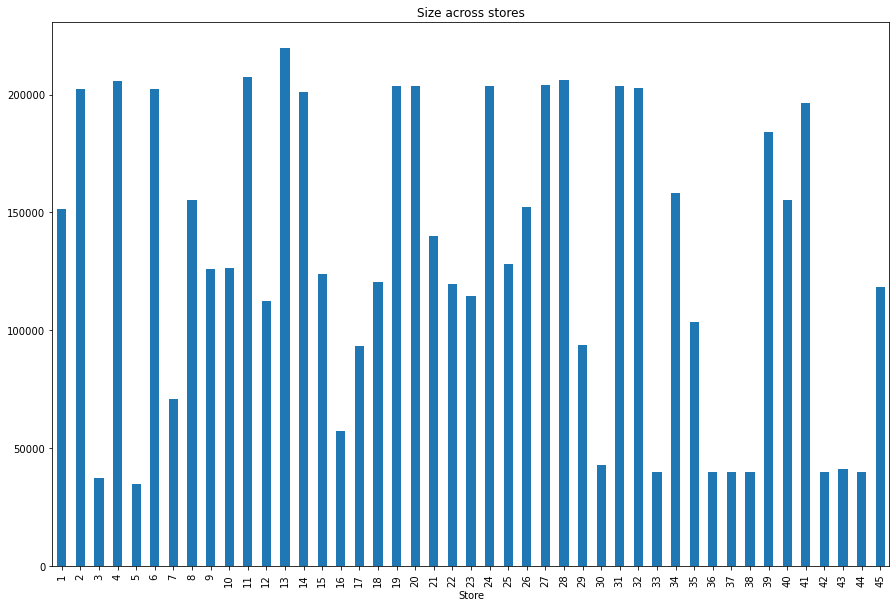

In [101]:
df_store_sizes = df.groupby('Store')['Size'].mean().plot(kind='bar',figsize=(15,10))
plt.title('Size across stores')

In [102]:
df.groupby(['Store'])['Weekly_Sales'].mean().corr(df.groupby(['Store'])['Size'].mean())

0.8072306200650591

## Key Point: Weekly_Sales across the stores correlates with store size (0.81). Drop either one feature when training.

## 2.2) How departments affect different types of stores' Weekly_Sales

Reason of investing this factor typewise: different types of stores might have different departments.

In [103]:
np.sort(df_typeA['Dept'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

In [104]:
np.sort(df_typeB['Dept'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83,
       85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

In [105]:
np.sort(df_typeC['Dept'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 38,
       40, 41, 42, 44, 46, 49, 52, 55, 56, 59, 60, 67, 71, 72, 74, 79, 80,
       81, 82, 83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [106]:
#Type A and B
print(len(np.intersect1d(df_typeA['Dept'].unique(),df_typeB['Dept'].unique())))
print(len(df_typeA['Dept'].unique()))
print(len(df_typeB['Dept'].unique()))

80
81
80


In [107]:
#Type B and C
print(len(np.intersect1d(df_typeC['Dept'].unique(),df_typeB['Dept'].unique())))
print(len(df_typeC['Dept'].unique()))
print(len(df_typeB['Dept'].unique()))

66
66
80


In [108]:
#Type A and C
print(len(np.intersect1d(df_typeC['Dept'].unique(),df_typeA['Dept'].unique())))
print(len(df_typeC['Dept'].unique()))
print(len(df_typeA['Dept'].unique()))

66
66
81


In [109]:
#common departments across the 3 types of stores
np.intersect1d(df_typeB['Dept'].unique(),np.intersect1d(df_typeC['Dept'].unique(),df_typeA['Dept'].unique()))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 38,
       40, 41, 42, 44, 46, 49, 52, 55, 56, 59, 60, 67, 71, 72, 74, 79, 80,
       81, 82, 83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

## Key Point: different Types of stores have different department

To see the effect of department on Weekly_Sales, the normalized Weekly_Sales across different departmetns is used. <br>
i.e., $$ \text{Normalized Weekly Sales} = \frac{\text{Total sales of that department}}{\text{No. of stores that include this department}}$$

In [110]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012


Text(0.5, 1.0, 'Average Weekly_Sales across various departments')

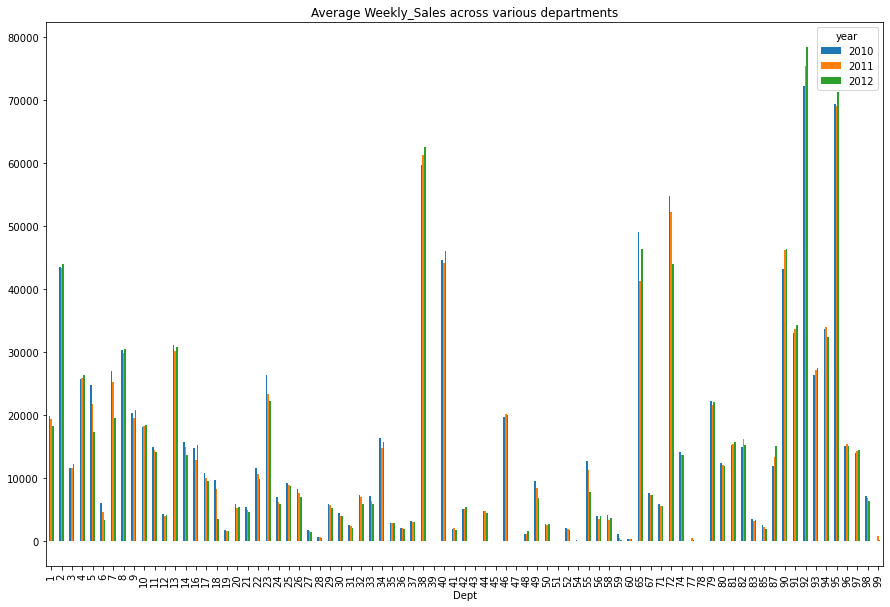

In [111]:
df.groupby(['Dept','year'])['Weekly_Sales'].mean().unstack().plot(kind='bar',figsize=(15,10))
plt.title('Average Weekly_Sales across various departments')

## Key Point: Dept does affect Weekly_Sales

<AxesSubplot:xlabel='Dept'>

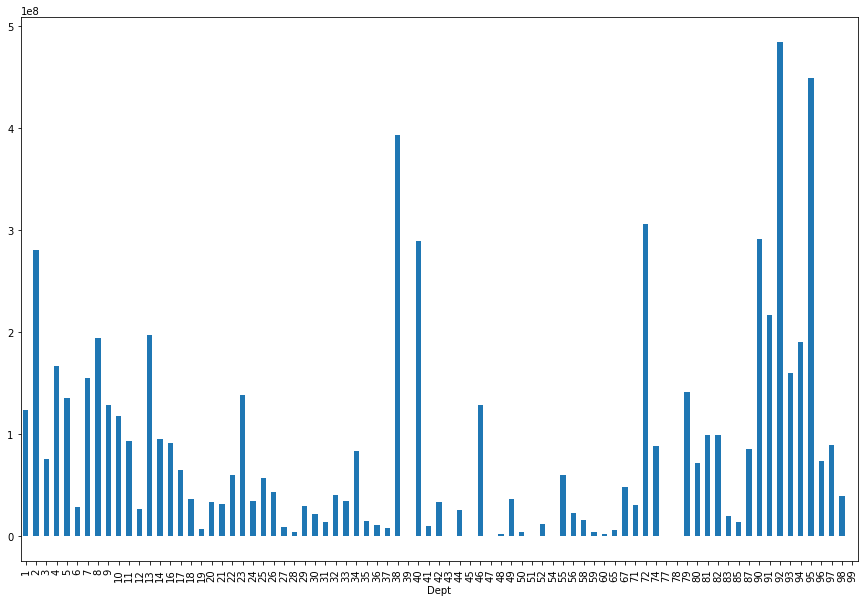

In [112]:
df.groupby('Dept')['Weekly_Sales'].sum().plot(kind='bar',figsize=(15,10))

Top 5 money generating departments:

In [113]:
df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)

Dept
92    4.839433e+08
95    4.493202e+08
38    3.931181e+08
72    3.057252e+08
90    2.910685e+08
Name: Weekly_Sales, dtype: float64

## 3) How holiday affect weekly_sales

In [114]:
df[df['IsHoliday']==True]['Date'].unique()

array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

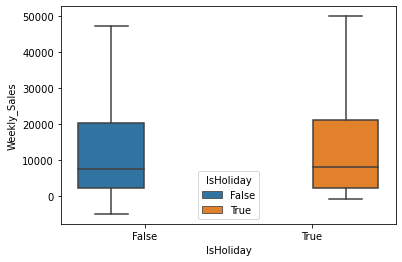

In [115]:
sns.boxplot(data=df,x='IsHoliday', y='Weekly_Sales',hue='IsHoliday',showfliers = False)

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

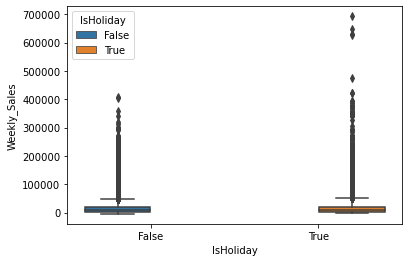

In [116]:
sns.boxplot(data=df,x='IsHoliday', y='Weekly_Sales',hue='IsHoliday')

## Key Point: that could be a problem, as isHoliday really affects Weekly_Sales from our knowledge.

Problem: how can we let the model take this into account.

Potential solution: add festival columns e.g. 'Christmas', 'Black Friday'...etc. '1' if that the festival occurs this week.

In [117]:
df['year'].unique()

array([2010, 2011, 2012], dtype=int64)

In [118]:
'''
For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

'''
super_bowl = pd.Series(['12-Feb-10', '11-Feb-11', '10-Feb-12', '8-Feb-13'])
labor_day = pd.Series(['10-Sep-10', '9-Sep-11', '7-Sep-12', '6-Sep-13'])
thanksgiving = pd.Series(['26-Nov-10', '25-Nov-11', '23-Nov-12', '29-Nov-13'])
christmas= pd.Series(['31-Dec-10', '30-Dec-11', '28-Dec-12', '27-Dec-13'])

super_bowl = pd.to_datetime(super_bowl)
labor_day = pd.to_datetime(labor_day)
thanksgiving = pd.to_datetime(thanksgiving)
christmas= pd.to_datetime(christmas)

In [119]:
df['super_bowl'] = df['Date'].isin(super_bowl)
df['super_bowl'] = df['super_bowl'].replace([True,False], [1,0])
df['labor_day'] = df['Date'].isin(labor_day)
df['labor_day'] = df['labor_day'].replace([True,False], [1,0])
df['thanksgiving'] = df['Date'].isin(thanksgiving)
df['thanksgiving'] = df['thanksgiving'].replace([True,False], [1,0])
df['christmas'] = df['Date'].isin(christmas)
df['christmas'] = df['christmas'].replace([True,False], [1,0])

In [120]:
#we don't need the "IsHoliday" column then
df = df.drop('IsHoliday',axis=1)

<AxesSubplot:>

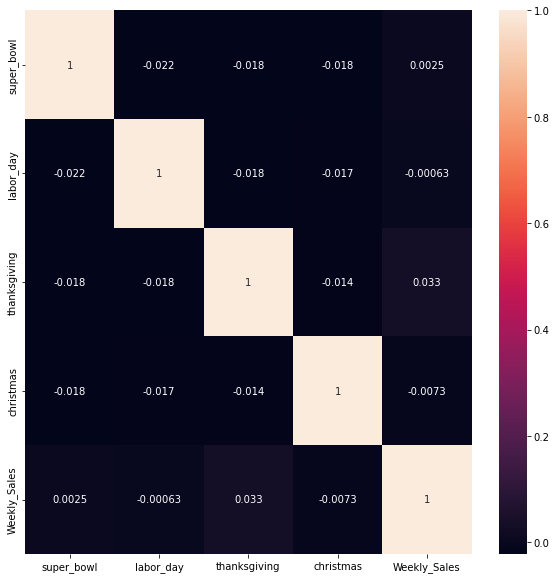

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[['super_bowl','labor_day','thanksgiving','christmas','Weekly_Sales']].corr(),annot=True)

## Key Point: Seems that this does not help.

## Quick thought: month, day, might be correlated to Weekly_Sales
In certain months e.g. Dec, sales boosts <br>
In certain days like the end of the month, people may buy less

In [58]:
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day

<AxesSubplot:>

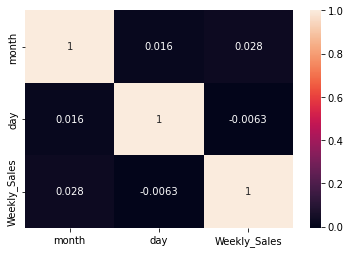

In [59]:
sns.heatmap(df[['month','day','Weekly_Sales']].corr(),annot=True)

# Storewise: weekly_sales across the whole period

# Business Analysis 

1) Each types of stores (A,B,C): percentage of total sales over the past 2 years?<br>
  a) For each types of stores, what is the percentage of earnings of the best 5 stores in the past 2 years (trend)?<br>
  b) For each types of stores, what is the percentage of earnings of the best 10 departments in the past 2 years (trend)? which store has these deparments?<br>

2) For ALL stores:<br>
  a) Over the past 2 years, which 5 stores has the highest earnings? What are the earning percentage (trend)? which type do they belong to?<br>
  b) Over the past 2 years, which 10 departments has the highest earnings? What are the earning percentage (trend)? which store has these departments?<br>

There are 4 festivals:<br>
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13<br>
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13<br>
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13<br>
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13<br>

3) 1 week before and 1 week after each festival:<br>
  a) how much is the total earning in this 3 weeks, over the past 2 years? What is the percentage comparing with yearly earning?<br>
	then department wise; top 5 department in these period? which type of store do they belong to?<br>
	then store wise: top 10 department in these period? which type of store do they belong to?<br>
	then compare figure in the 2 years (if have data)<br>
    
  b) What is the sales percentage change in these 3 weeks?<br>
	then department wise; top 5 department in these period? which type of store do they belong to?<br>
	then store wise: top 10 department in these period? which type of store do they belong to?<br>
	then compare figure in the 2 years (if have data)<br>

4) Does markdown has anything to do with weekly sales across the


1) Each types of stores (A,B,C): percentage of total sales over the past 2 years?

In [154]:
type_A_total_sales = df_typeA['Weekly_Sales'].sum()
type_B_total_sales = df_typeB['Weekly_Sales'].sum()
type_C_total_sales = df_typeC['Weekly_Sales'].sum()

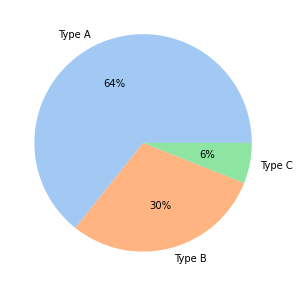

In [155]:
data = [type_A_total_sales,type_B_total_sales,type_C_total_sales]
labels = ['Type A', 'Type B', 'Type C']

fig, ax = plt.subplots(figsize=(5,5))
colors = sns.color_palette('pastel')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

64% of total sales is generated by Type A stores, while only 6% is generated by Type C stores.

a) For each types of stores, what is the percentage of earnings of the best 5 stores in the past 2 years (trend)? <br>

In [156]:
#Add month and day
df_typeA['month'] = pd.to_datetime(df_typeA['Date']).dt.month
df_typeA['day'] = pd.to_datetime(df_typeA['Date']).dt.day

df_typeB['month'] = pd.to_datetime(df_typeB['Date']).dt.month
df_typeB['day'] = pd.to_datetime(df_typeB['Date']).dt.day

df_typeC['month'] = pd.to_datetime(df_typeC['Date']).dt.month
df_typeC['day'] = pd.to_datetime(df_typeC['Date']).dt.day

C:\Users\Thomas\AppData\Local\Temp/ipykernel_11448/3841247797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_typeA['month'] = pd.to_datetime(df_typeA['Date']).dt.month
C:\Users\Thomas\AppData\Local\Temp/ipykernel_11448/3841247797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_typeA['day'] = pd.to_datetime(df_typeA['Date']).dt.day
C:\Users\Thomas\AppData\Local\Temp/ipykernel_11448/3841247797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [157]:
#Feb10 to Feb 12

#Type A stores
df_typeA_2010 = df_typeA[ (df_typeA['year']==2010) | ((df_typeA['year']==2011) & (df_typeA['month']<3)) ]
df_typeA_2011 = df_typeA[ (df_typeA['year']==2011) | ((df_typeA['year']==2012) & (df_typeA['month']<3)) ]

In [158]:
#2010 total earnings
typeA_2010_total_sales = df_typeA_2010['Weekly_Sales'].sum()
df_typeA_2010.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)/typeA_2010_total_sales*100

Store
14    7.109943
20    6.962731
4     6.610745
2     6.518015
13    6.487773
Name: Weekly_Sales, dtype: float64

In [159]:
#2011 total earnings
typeA_2011_total_sales = df_typeA_2011['Weekly_Sales'].sum()
df_typeA_2011.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)/typeA_2011_total_sales*100

Store
4     7.080490
20    6.979549
14    6.675678
13    6.620331
2     6.274482
Name: Weekly_Sales, dtype: float64

In [160]:
#Type B Stores
df_typeB_2010 = df_typeB[ (df_typeB['year']==2010) | ((df_typeB['year']==2011) & (df_typeB['month']<3)) ]
df_typeB_2011 = df_typeB[ (df_typeB['year']==2011) | ((df_typeB['year']==2012) & (df_typeB['month']<3)) ]

In [161]:
#2010 total earnings
typeB_2010_total_sales = df_typeB_2010['Weekly_Sales'].sum()
df_typeB_2010.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)/typeB_2010_total_sales*100

Store
10    13.826797
23     9.730948
18     8.048291
35     7.344748
22     7.332594
Name: Weekly_Sales, dtype: float64

In [162]:
#2011 total earnings
typeB_2011_total_sales = df_typeB_2011['Weekly_Sales'].sum()
df_typeB_2011.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)/typeB_2011_total_sales*100

Store
10    13.747371
23     9.883600
18     7.507911
22     7.349341
12     7.331144
Name: Weekly_Sales, dtype: float64

Can compare with weekly sales of all Walmart stores

In [163]:
#Type C Stores
df_typeC_2010 = df_typeC[ (df_typeC['year']==2010) | ((df_typeC['year']==2011) & (df_typeC['month']<3)) ]
df_typeC_2011 = df_typeC[ (df_typeC['year']==2011) | ((df_typeC['year']==2012) & (df_typeC['month']<3)) ]

In [164]:
#2010 total earnings
typeC_2010_total_sales = df_typeC_2010['Weekly_Sales'].sum()
df_typeC_2010.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)/typeC_2010_total_sales*100

Store
43    23.354107
42    19.252986
37    18.444357
30    16.237846
38    12.517288
Name: Weekly_Sales, dtype: float64

In [165]:
#2011 total earnings
typeC_2011_total_sales = df_typeC_2011['Weekly_Sales'].sum()
df_typeC_2011.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)/typeC_2011_total_sales*100

Store
43    21.899495
42    20.020515
37    18.496938
30    15.148072
38    13.798041
Name: Weekly_Sales, dtype: float64

b) For each types of stores, what is the percentage of earnings of the best 10 departments in the past 2 years (trend)? which store has these deparments?

In [166]:
#Type A 2010 Dept earnings
typeA_2010_total_sales = df_typeA_2010['Weekly_Sales'].sum()
df_typeA_2010.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)/typeA_2010_total_sales*100

Dept
92    7.945248
95    6.965596
90    4.972778
38    4.689736
72    4.409687
91    3.927520
40    3.875130
2     3.727918
94    3.672101
93    3.067580
Name: Weekly_Sales, dtype: float64

In [167]:
#Type A 2010 Dept earnings
typeA_2011_total_sales = df_typeA_2011['Weekly_Sales'].sum()
df_typeA_2011.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)/typeA_2011_total_sales*100

Dept
92    8.290143
95    6.974836
90    5.282014
38    4.797942
72    4.287699
91    3.941485
40    3.901123
2     3.783613
94    3.704173
93    3.169367
Name: Weekly_Sales, dtype: float64

In [168]:
#Type B 2010 Dept earnings
typeB_2010_total_sales = df_typeB_2010['Weekly_Sales'].sum()
df_typeB_2010.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)/typeB_2010_total_sales*100

Dept
38    6.941769
72    6.861928
2     5.161936
40    5.159564
95    4.862069
92    3.582937
13    3.459495
8     3.352264
23    3.143880
7     3.074846
Name: Weekly_Sales, dtype: float64

In [169]:
#Type B 2011 Dept earnings
typeB_2011_total_sales = df_typeB_2011['Weekly_Sales'].sum()
df_typeB_2011.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)/typeB_2011_total_sales*100

Dept
38    7.289066
72    6.664431
2     5.222723
40    5.150544
95    4.968845
92    4.044969
13    3.371053
8     3.349006
23    3.105913
7     2.869186
Name: Weekly_Sales, dtype: float64

In [170]:
#Type C 2010 Dept earnings
typeC_2010_total_sales = df_typeC_2010['Weekly_Sales'].sum()
df_typeC_2010.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)/typeC_2010_total_sales*100

Dept
92    12.812780
38    11.166597
95    10.709253
90     9.018091
94     6.688106
91     6.575294
93     4.989892
40     4.283753
96     3.358134
2      3.061039
Name: Weekly_Sales, dtype: float64

In [171]:
#Type C 2011 Dept earnings
typeC_2011_total_sales = df_typeC_2011['Weekly_Sales'].sum()
df_typeC_2011.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)/typeC_2011_total_sales*100

Dept
92    13.043000
38    11.618509
95    10.581790
90     9.485316
94     6.605859
91     6.440265
93     5.081618
40     4.239596
96     3.259159
2      3.037736
Name: Weekly_Sales, dtype: float64

2) For ALL stores: <br>
a) Over the past 2 years, which 5 stores has the highest earnings? What are the earning percentage (trend)? which type do they belong to?<br>
b) Over the past 2 years, which 10 departments has the highest earnings? What are the earning percentage (trend)? which store has these departments?<br>

a) Over the past 2 years, which 5 stores has the highest earnings? What are the earning percentage (trend)? which type do they belong to?

In [172]:
df_2010 = df[ (df['year']==2010) | ((df['year']==2011) & (df['month']<3)) ]
df_2011 = df[ (df['year']==2011) | ((df['year']==2012) & (df['month']<3)) ]

In [173]:
#2010  store earnings
total_sales_2010 = df_2010['Weekly_Sales'].sum()
df_2010.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)/total_sales_2010*100

Store
14    4.556904
20    4.462553
4     4.236958
2     4.177525
13    4.158143
Name: Weekly_Sales, dtype: float64

In [174]:
#2011  store earnings
total_sales_2011 = df_2011['Weekly_Sales'].sum()
df_2011.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)/total_sales_2011*100

Store
4     4.564227
20    4.499158
14    4.303277
13    4.267600
10    4.055154
Name: Weekly_Sales, dtype: float64

b) Over the past 2 years, which 10 departments has the highest earnings? What are the earning percentage (trend)? which store has these departments?

In [175]:
#2010 dept earnings
total_sales_2010 = df_2010['Weekly_Sales'].sum()
df_2010.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)/total_sales_2010*100

Dept
92    6.924473
95    6.555932
38    5.748157
72    4.885766
40    4.284569
90    4.154965
2     4.118646
91    3.188276
13    2.955518
8     2.881876
Name: Weekly_Sales, dtype: float64

In [176]:
#2011 dept earnings
total_sales_2011 = df_2011['Weekly_Sales'].sum()
df_2011.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)/total_sales_2011*100

Dept
92    7.325003
95    6.600987
38    5.944749
72    4.731101
90    4.462696
40    4.290118
2     4.163064
91    3.266083
13    2.894355
8     2.876345
Name: Weekly_Sales, dtype: float64

3) 1 week before and 1 week after each festival:<br>
a) how much is the total earning in this 3 weeks, over the past 2 years? What is the percentage comparing with yearly earning? <br>
then department wise; top 5 department in these period? which type of store do they belong to?<br>
then store wise: top 10 department in these period? which type of store do they belong to?<br>
then compare figure in the 2 years (if have data)<br>

b) What is the sales percentage change in these 3 weeks?<br>
then department wise; top 5 department in these period? which type of store do they belong to?<br>
then store wise: top 10 department in these period? which type of store do they belong to?<br>
then compare figure in the 2 years (if have data)

a) how much is the total earning in this 3 weeks, over the past 2 years? What is the percentage comparing with yearly earning? 

In [177]:
df['week'] = df['Date'].dt.weekofyear

C:\Users\Thomas\AppData\Local\Temp/ipykernel_11448/4139912652.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['Date'].dt.weekofyear


#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 <br>
#Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13<br>
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13<br>
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13<br>

In [205]:
#super bowl
super_bowl_2010_week = df[(df['year']==2010)&(df['super_bowl'])==1].iloc[0]['week']
super_bowl_2011_week = df[(df['year']==2011)&(df['super_bowl'])==1].iloc[0]['week']

6

In [222]:
#2010 super bowl
df_2010[((df_2010['week']==super_bowl_2010_week) & (df_2010['year']==2010))|((df_2010['week']==super_bowl_2010_week-1)&(df_2010['year']==2010))| \
        ((df_2010['week']==super_bowl_2010_week+1) & (df_2010['year']==2010))]['Weekly_Sales'].sum()/df_2010['Weekly_Sales'].sum()*100

5.546342068822827

In [223]:
#2011 super bowl
df_2011[((df_2011['week']==super_bowl_2011_week) & (df_2011['year']==2011))|((df_2011['week']==super_bowl_2011_week-1)&(df_2011['year']==2011))| \
        ((df_2011['week']==super_bowl_2011_week+1) & (df_2011['year']==2011))]['Weekly_Sales'].sum()/df_2011['Weekly_Sales'].sum()*100

5.0621853445924945

In [192]:
#labor day
labor_day_2010_week = df[(df['year']==2010)&(df['labor_day'])==1].iloc[0]['week']
labor_day_2011_week = df[(df['year']==2011)&(df['labor_day'])==1].iloc[0]['week']

In [193]:
#2010 labor_day
df_2010[(df_2010['week']==labor_day_2010_week)|(df_2010['week']==labor_day_2010_week-1 )| \
        (df_2010['week']==labor_day_2010_week+1 )]['Weekly_Sales'].sum()/df_2010['Weekly_Sales'].sum()*100

5.150217590264691

In [198]:
#2011 labor_day
df_2011[(df_2011['week']==labor_day_2011_week)|(df_2011['week']==labor_day_2011_week-1 )| \
        (df_2011['week']==labor_day_2011_week+1 )]['Weekly_Sales'].sum()/df_2011['Weekly_Sales'].sum()*100

4.839071148339098

In [195]:
#thanksgiving
thanksgiving_2010_week = df[(df['year']==2010)&(df['thanksgiving'])==1].iloc[0]['week']
thanksgiving_2011_week = df[(df['year']==2011)&(df['thanksgiving'])==1].iloc[0]['week']

In [196]:
#2010 thanksgiving
df_2010[(df_2010['week']==thanksgiving_2010_week)|(df_2010['week']==thanksgiving_2010_week-1 )| \
        (df_2010['week']==thanksgiving_2010_week+1 )]['Weekly_Sales'].sum()/df_2010['Weekly_Sales'].sum()*100

6.095538295670431

Dept 47

In [199]:
#2011 thanksgiving
df_2011[(df_2011['week']==thanksgiving_2011_week)|(df_2011['week']==thanksgiving_2011_week-1 )| \
        (df_2011['week']==thanksgiving_2011_week+1 )]['Weekly_Sales'].sum()/df_2011['Weekly_Sales'].sum()*100

5.781865571392368

### Christmas is tricky: Christmas Week = 52, which is the last week of a year

In [201]:
#christmas
christmas_2010_week = df[(df['year']==2010)&(df['christmas'])==1].iloc[0]['week']
christmas_2011_week = df[(df['year']==2011)&(df['christmas'])==1].iloc[0]['week']

In [220]:
#2010 christmas
df_2010[(df_2010['week']==christmas_2010_week)|(df_2010['week']==christmas_2010_week-1 )| \
        ((df_2010['year']==2011) & (df_2010['week']==1) )]['Weekly_Sales'].sum()/df_2010['Weekly_Sales'].sum()*100

6.219981924975033

In [221]:
#2011 christmas
df_2011[(df_2011['week']==christmas_2011_week)|(df_2011['week']==christmas_2011_week-1 )| \
        ((df_2011['year']==2012) & (df_2011['week']==1) )]['Weekly_Sales'].sum()/df_2011['Weekly_Sales'].sum()*100

5.980356741417276

C:\Users\Thomas\AppData\Local\Temp/ipykernel_11448/974114326.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(5,5))


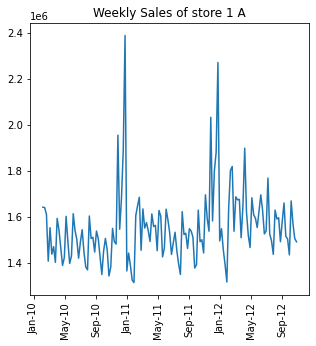

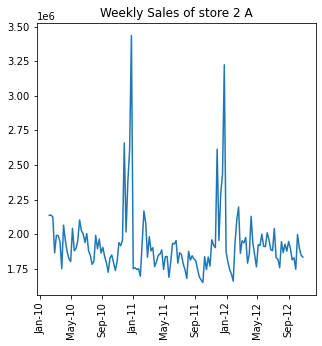

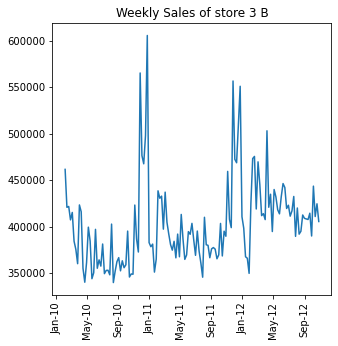

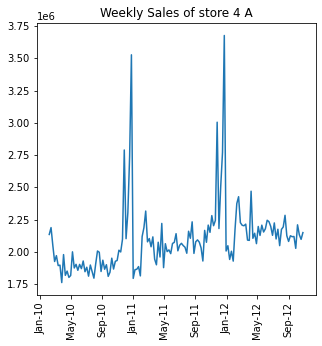

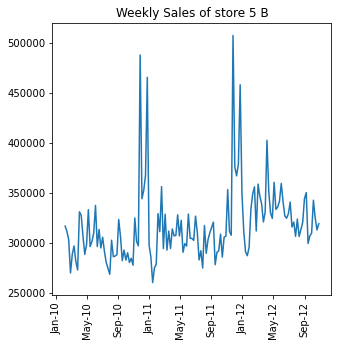

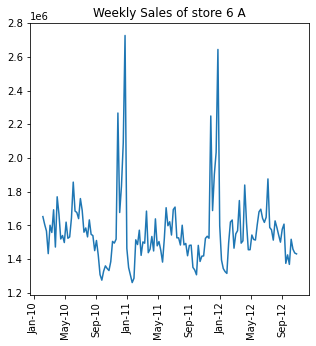

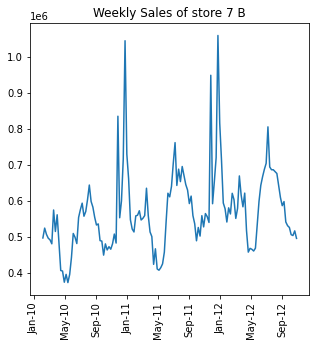

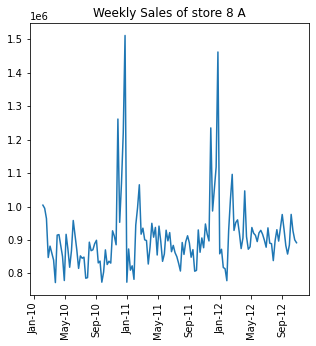

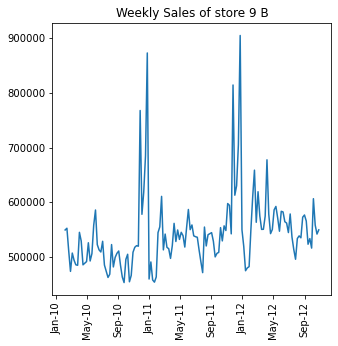

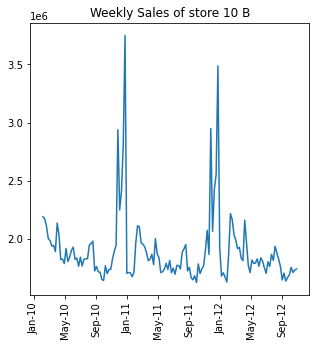

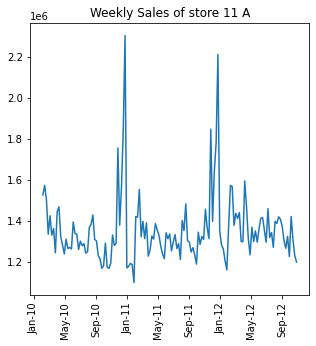

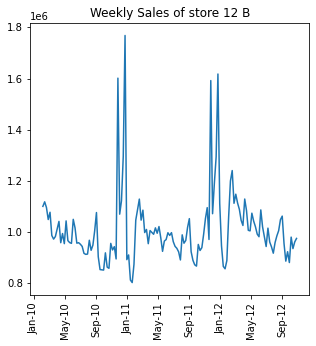

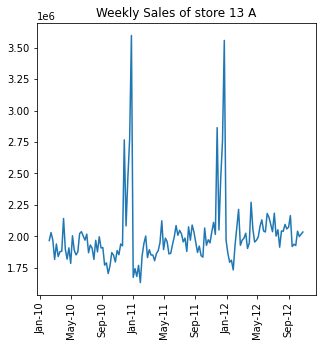

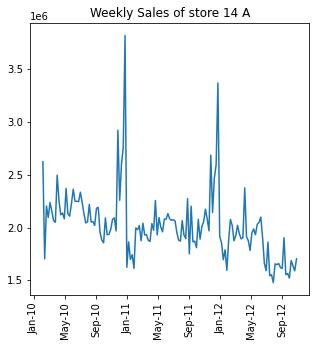

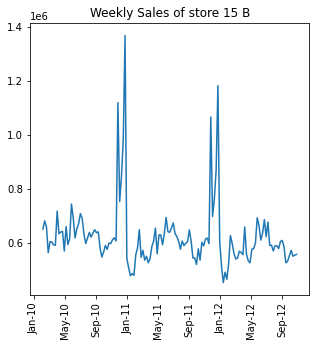

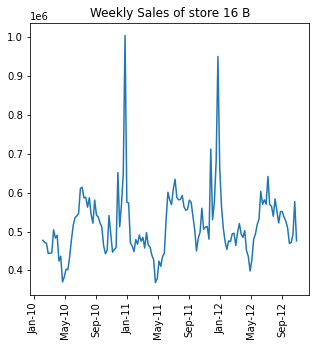

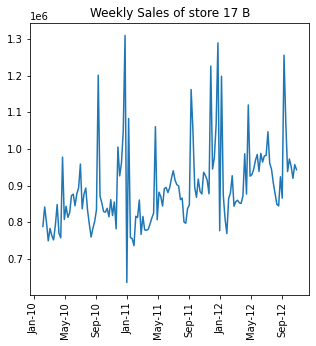

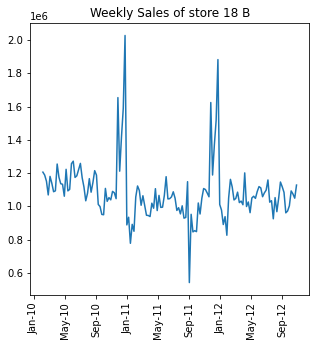

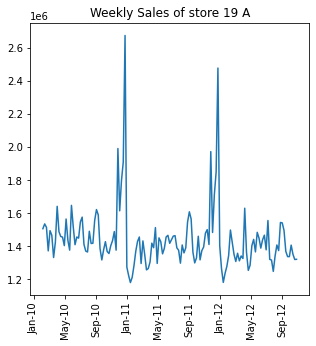

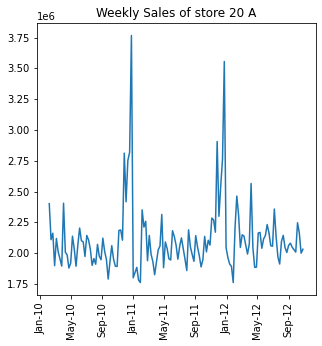

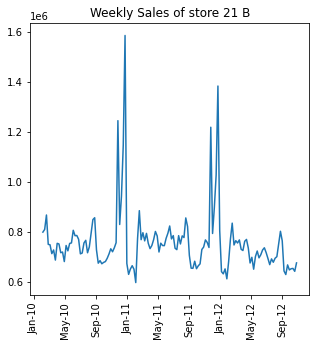

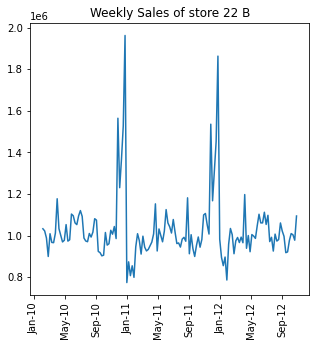

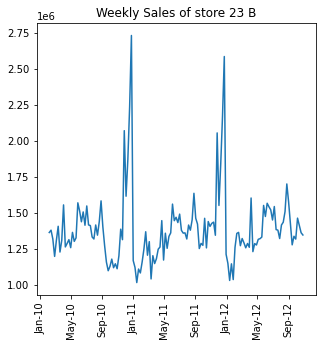

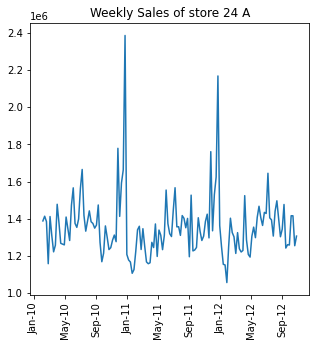

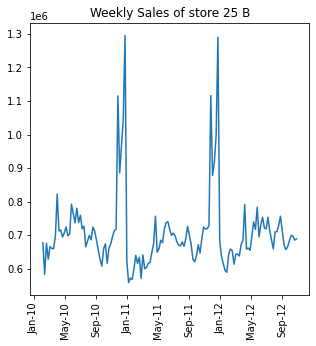

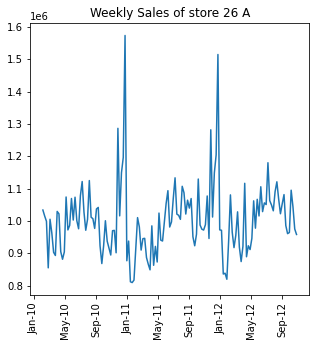

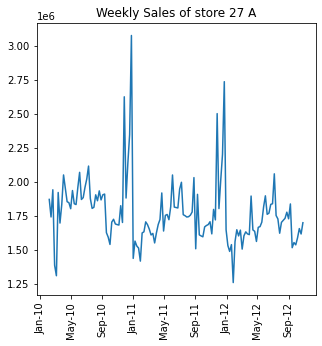

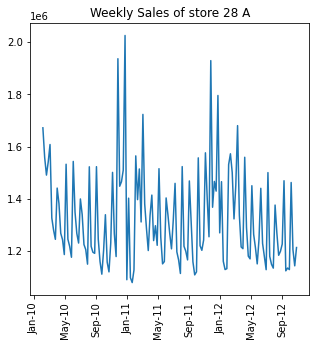

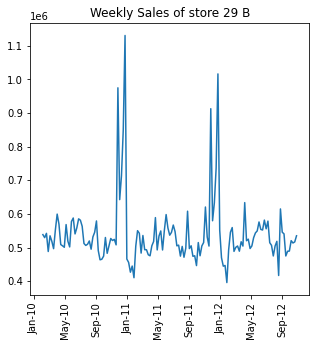

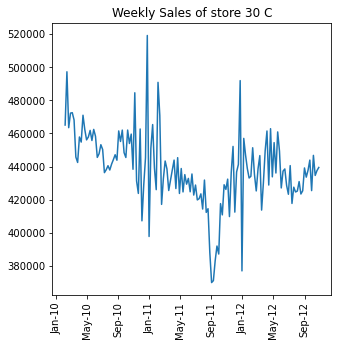

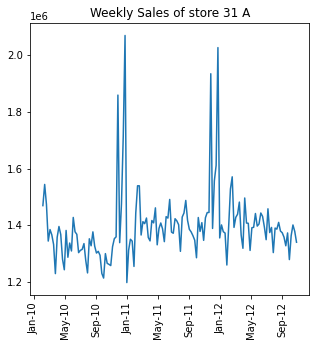

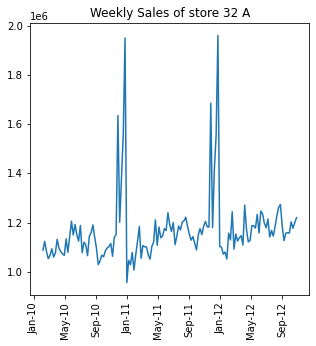

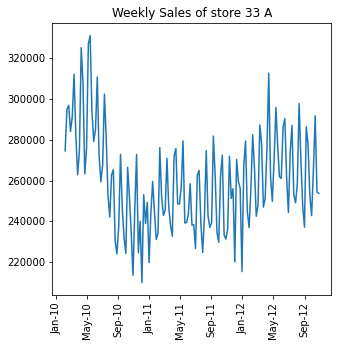

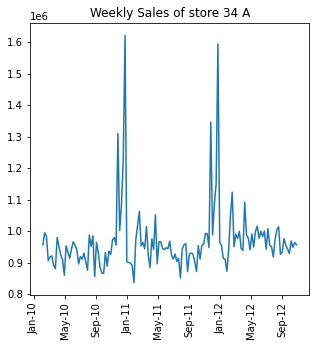

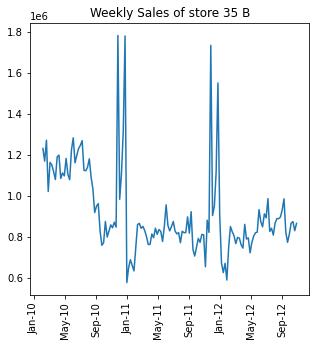

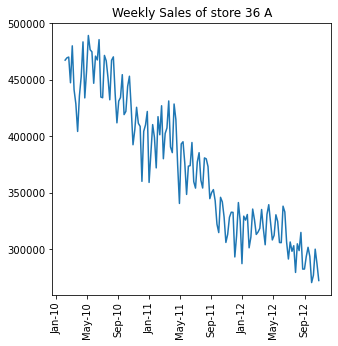

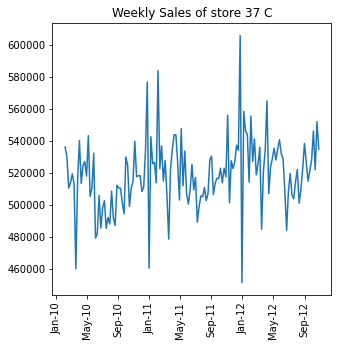

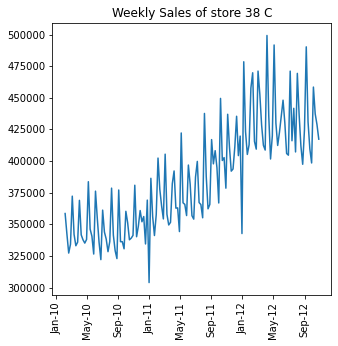

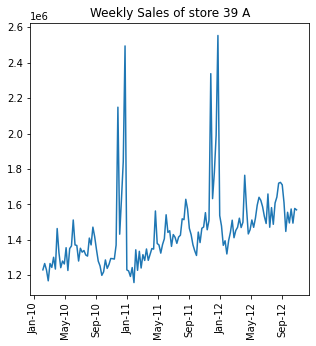

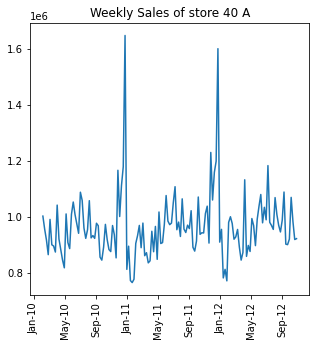

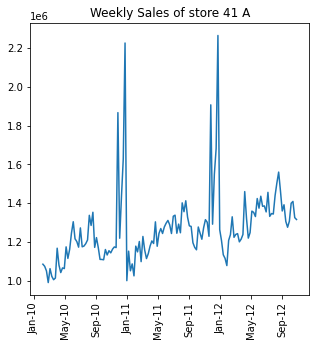

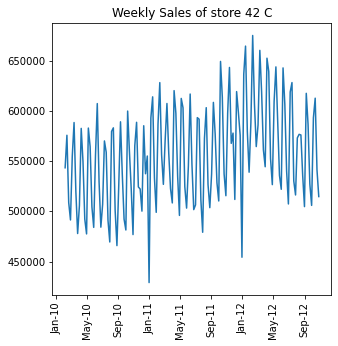

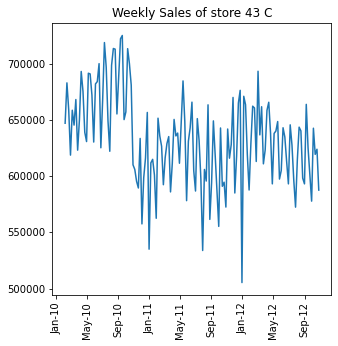

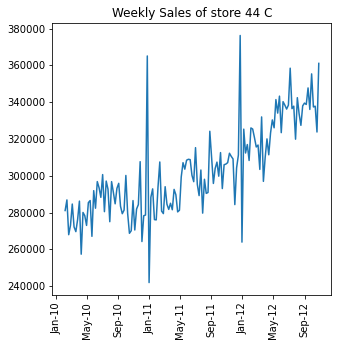

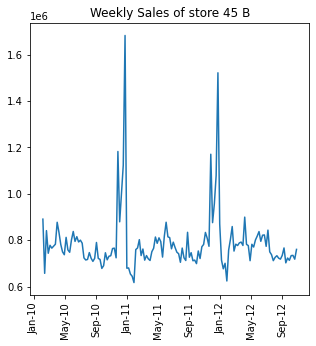

In [262]:
for i in df['Store'].unique():
    fig, ax = plt.subplots(figsize=(5,5))
    plt.plot(df.groupby(['Store','Date'])['Weekly_Sales'].sum()[i])
    ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
    ax.tick_params(axis="x", labelrotation= 90)
    plt.title("Weekly Sales of store " + str(i) + ' '+ df.groupby(['Store','Date','Type'])['Weekly_Sales'].sum()[i].index[0][1])

When drop?
Which dept drop?

## Key Point: Store 36's weekly sales is declining. Very concerning. 

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,year,super_bowl,labor_day,thanksgiving,christmas,month,day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,2010,0,0,0,0,2,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,2010,0,0,0,0,2,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,2010,0,0,0,0,2,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,2010,0,0,0,0,2,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,2010,0,0,0,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,2012,0,0,0,0,10,26
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,2012,0,0,0,0,10,26
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,2012,0,0,0,0,10,26
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,2012,0,0,0,0,10,26


# Cleaning the data for training

In [13]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [4]:
df = df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)

In [5]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [6]:
df['IsHoliday'] = df['IsHoliday'].replace([True,False],[1,0])

In [7]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,0,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,0,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,0,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,0,42.31,2.572,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,58.85,3.882,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,0,58.85,3.882,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,0,58.85,3.882,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,0,58.85,3.882,192.308899,8.667,B,118221


In [8]:
#deal with store types:
store_types=pd.get_dummies(df['Type'],drop_first=True) ## parameter (data, drop_first)

In [9]:
store_types

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
421565,1,0
421566,1,0
421567,1,0
421568,1,0


In [10]:
df=pd.concat([df,store_types],axis=1)
df = df.drop('Type',axis=1) #we no longer need the origianl column

In [11]:
#add month column
df['month'] = df['Date'].apply(lambda x: int(x.split(sep='-')[1]))

In [32]:
#get week of the month
from math import ceil
import datetime
def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

In [54]:
#df['week'] = df['Date'].apply(lambda x: week_of_month(datetime.datetime(int(x.split(sep='-')[0]),int(x.split(sep='-')[1]),int(x.split(sep='-')[2]))))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  int64  
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Size          421570 non-null  int64  
 10  B             421570 non-null  uint8  
 11  C             421570 non-null  uint8  
 12  month         421570 non-null  int64  
dtypes: float64(5), int64(5), object(1), uint8(2)
memory usage: 36.2+ MB


In [18]:
#df['Date'] = pd.to_datetime(df['Date'])
df['week'] = df['Date'].dt.week

C:\Users\Thomas\AppData\Local\Temp/ipykernel_16856/3521548731.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['Date'].dt.week


In [20]:
df_with_yearly_week = df.drop('Date',axis = 1)

In [21]:
df_with_yearly_week.to_csv('./datasets/cleaned_training_data_with_yearly_week.csv',index=False)

In [57]:
week_of_month(datetime.datetime(int(df['Date'].iloc[421565].split(sep='-')[0]), int(df['Date'].iloc[421565].split(sep='-')[1]), int(df['Date'].iloc[421565].split(sep='-')[2])))

4

In [63]:
#drop the "Date" as we no longer needs it
df = df.drop('Date',axis = 1)

In [64]:
df

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,month,week,B,C
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,151315,2,1,0,0
1,1,2,50605.27,0,42.31,2.572,211.096358,8.106,151315,2,1,0,0
2,1,3,13740.12,0,42.31,2.572,211.096358,8.106,151315,2,1,0,0
3,1,4,39954.04,0,42.31,2.572,211.096358,8.106,151315,2,1,0,0
4,1,5,32229.38,0,42.31,2.572,211.096358,8.106,151315,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,0,58.85,3.882,192.308899,8.667,118221,10,4,1,0
421566,45,94,5203.31,0,58.85,3.882,192.308899,8.667,118221,10,4,1,0
421567,45,95,56017.47,0,58.85,3.882,192.308899,8.667,118221,10,4,1,0
421568,45,97,6817.48,0,58.85,3.882,192.308899,8.667,118221,10,4,1,0


In [65]:
df.to_csv('./datasets/cleaned_training_data.csv',index=False)

In [22]:
df_test = pd.read_csv('./datasets/test_merge_with_features_and_stores.csv')

In [23]:
df_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
